# K-Means From Scratch
We will:
1. Initialize K centroids  
2. Assign each point to its closest centroid  
3. Compute new centroids as the mean of assigned points  
4. Calculate the total cost (sum of squared distances)  
5. Repeat steps 2 & 3 until the centroids stop changing  
6. Run 100 random initializations, keep the clustering with the lowest cost  
7. Visualize the best clusters + centroids

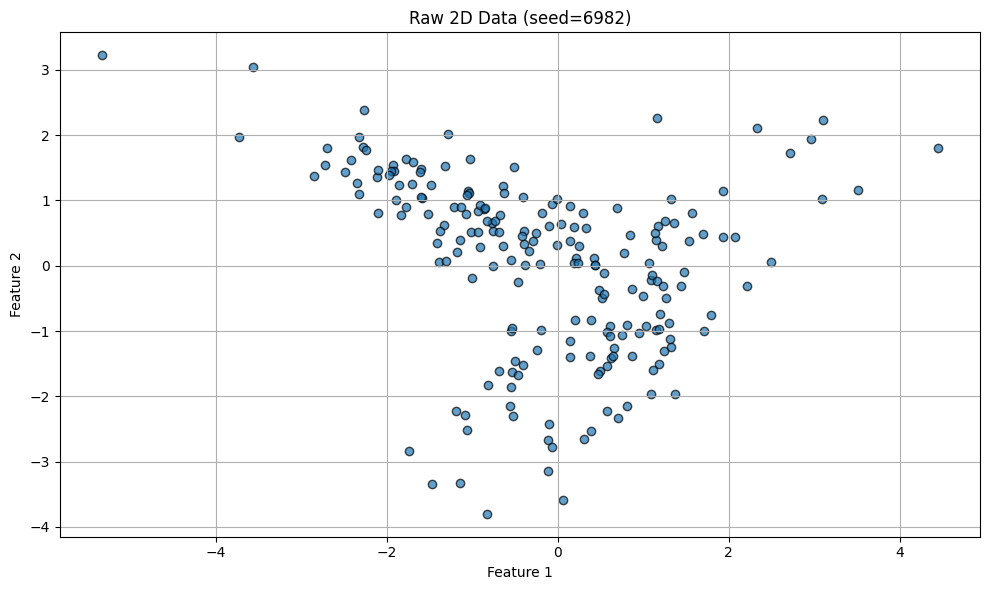

In [175]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# seed = None

# Generate reproducible data with seed
# X, _ = make_classification(
#     n_samples=200,
#     n_features=2,
#     n_informative=2,
#     n_redundant=0,
#     random_state=seed,
#     n_clusters_per_class=1,
#     class_sep=0.8
# )

# Random seed each time
seed = np.random.randint(0, 10000)
X, _ = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=seed,
    n_clusters_per_class=1,
    class_sep=0.8
)

# scatter of the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, edgecolors='k')
plt.title(f"Raw 2D Data (seed={seed})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [176]:
# K-Means helper functions
def initialize_centroids(X, k):
    """Step 1: Randomly pick k points as initial centroids."""
    idx = np.random.choice(len(X), k, replace=False)
    return X[idx]

def assign_clusters(X, centroids):
    """Step 2: Assign each sample to the nearest centroid."""
    d = np.linalg.norm(X[:,None] - centroids, axis=2)
    return np.argmin(d, axis=1)

def compute_centroids(X, labels, k):
    """Step 3: Recompute centroids as the mean of assigned points."""
    return np.array([X[labels==i].mean(axis=0) for i in range(k)])

def compute_cost(X, labels, centroids):
    """Step 4: Compute sum of squared distances (cost)."""
    return sum(((X[labels==i] - centroids[i])**2).sum() for i in range(len(centroids)))

def run_kmeans(X, k, max_iters=100, tol=1e-4):
    """Steps 1–5: One full run of K-Means until convergence."""
    centroids = initialize_centroids(X, k)
    cost_history = []
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        cost = compute_cost(X, labels, centroids)
        cost_history.append(cost)
        new_c = compute_centroids(X, labels, k)
        if np.linalg.norm(new_c - centroids) < tol:
            break
        centroids = new_c
    return centroids, labels, cost_history

In [177]:
# 100 runs to select the best
k = 3
best_cost = np.inf
for _ in range(100):
    centroids, labels, history = run_kmeans(X, k)
    if history[-1] < best_cost:
        best_cost, best_centroids, best_labels, best_history = history[-1], centroids, labels, history

print(f"Best final cost after 100 runs: {best_cost:.2f}")

Best final cost after 100 runs: 258.49


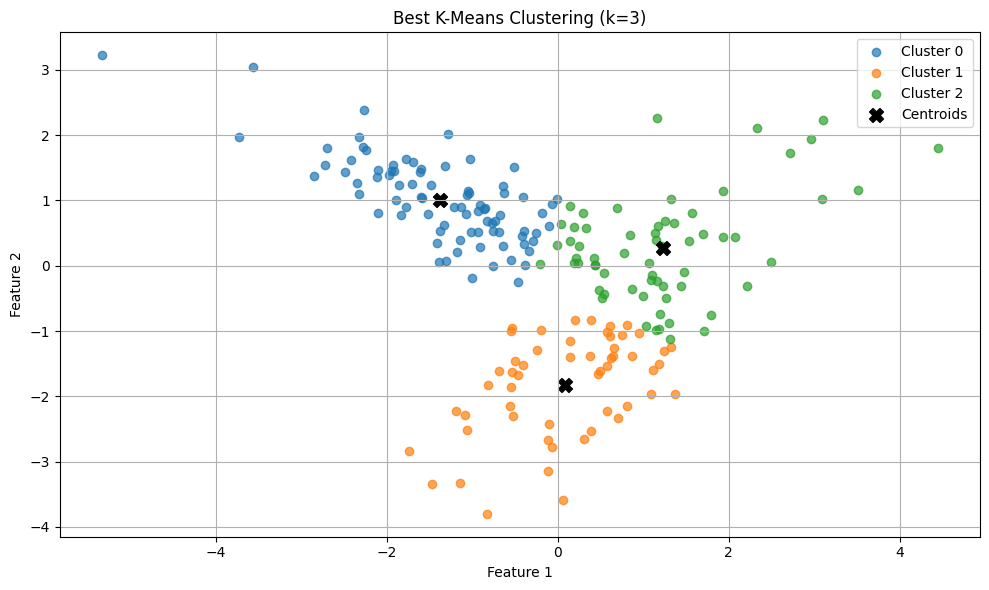

In [178]:
# Visualize best clusters + centroids with Plotly
plt.figure(figsize=(10, 6))
for cluster_label in np.unique(best_labels):
    mask = best_labels == cluster_label
    plt.scatter(
        X[mask, 0],
        X[mask, 1],
        label=f"Cluster {cluster_label}",
        alpha=0.7
    )
# Plot centroids
plt.scatter(
    best_centroids[:, 0],
    best_centroids[:, 1],
    marker='X',
    s=100,
    c='black',
    label='Centroids'
)
plt.title(f"Best K-Means Clustering (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

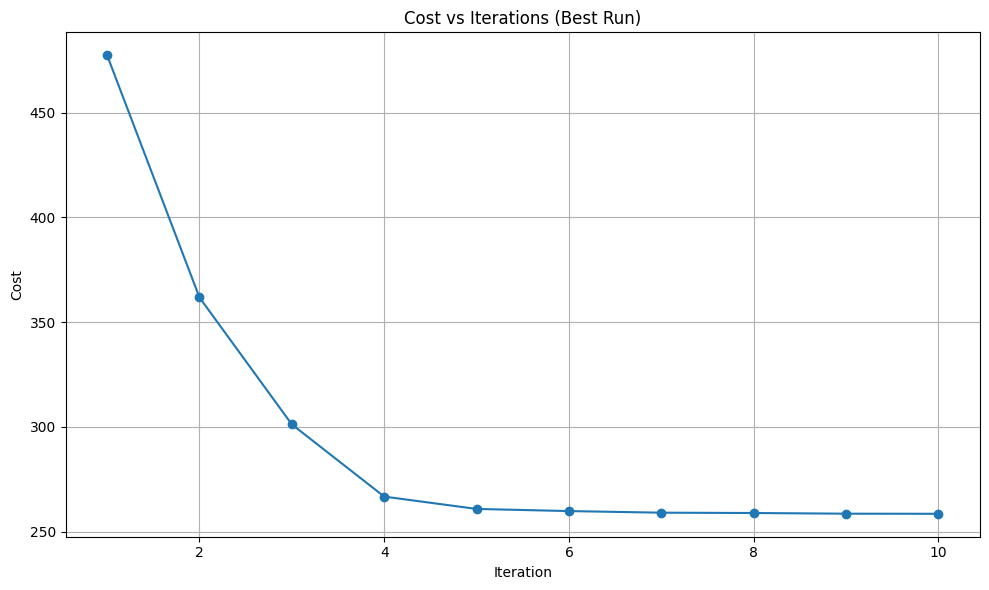

In [179]:
# Cost vs. iterations for the best run
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(1, len(best_history) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, best_history, marker='o')
plt.title("Cost vs Iterations (Best Run)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()